In [19]:
import numpy as np
import pandas as pd
df = pd.read_csv('spam.csv', encoding='cp1252')
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
113,spam,GENT! We are trying to contact you. Last weeke...,NaN,NaN,NaN
3800,ham,"It's ok, at least armand's still around",NaN,NaN,NaN
1364,ham,Hey i will be really pretty late... You want t...,NaN,NaN,NaN
3560,spam,Text BANNEDUK to 89555 to see! cost 150p texto...,NaN,NaN,NaN
525,ham,Hi i won't b ard 4 christmas. But do enjoy n m...,NaN,NaN,NaN


In [20]:
df.shape


(5572, 5)

In [5]:
#1.DATA CLEANING
#2.EDA
#3.TEXT PREPROCESSING
#4.MODEL BUILDING
#5.EVALUATION
#6.IMPROVEMENT
#7.WEBSITE
#8.DEPLOYMENT

In [ ]:
1.DATA CLEANING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [21]:
#DROPPING LAST 3 COLUMNS
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [22]:
df.sample(5)


,v1,v2
1146,ham,Babe ? I lost you ... :-(
2687,ham,Okie
1218,ham,K..k..i'm also fine:)when will you complete th...
4043,ham,"Yes, my reg is Ciao!"
1794,ham,How much i gave to you. Morning.


In [23]:
#RENAMING COLUMN NAMES
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)


,target,text
1442,ham,"Its ok., i just askd did u knw tht no?"
2122,ham,Do you know when the result.
3517,ham,Are you willing to go for apps class.
720,ham,Oh is it? Send me the address
3900,ham,That depends. How would you like to be treated...


In [24]:
#HERE HAM=NOT-SPAM
#CONVERSION I.E SPAM=1,HAM=0
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
#CHECKING MISSING VALUES
df.isnull().sum()

target    0
text      0
dtype: int64

In [26]:
#CHECK FOR DUPLICATE VALUES
df.duplicated().sum()

np.int64(403)

In [27]:
#REMOVING DUPLICATES
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [21]:
#CHECKING HAM AND SPAM RECORDS
df['target'].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

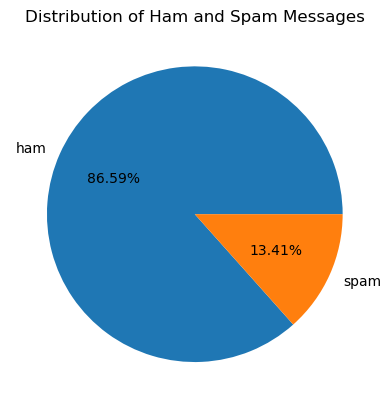

In [28]:
#VISUALIZATION IN PIE-CHART
import matplotlib.pyplot as plt  # <- Make sure this is imported


plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct="%.2f%%")
plt.title('Distribution of Ham and Spam Messages')
plt.show()


In [29]:
#CHECKING NUMBER OF CHARACTERS,WORDS,SENTENCES IN EACH MESSAGE
!pip install nltk

In [26]:
import nltk

In [30]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [31]:
#CHECKING LENGTH OF EACH MSG
df['num_characters']=df['text'].apply(len)

In [32]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [47]:
#3.DATA PREPROCESSING 
#.LOWER CASE
#.TOKENIZATION(breaking of words)
#.REMOVING SPECIAL CHARACTERS
#.REMOVING STOP WORDS(is,of,the) & PUNCTUATIONS
#.STEAMING(dance,dancing,dances)

In [33]:
import re
import string
from nltk.corpus import stopwords  # for stopword removal
from nltk.stem.porter import PorterStemmer  # for stemming
import nltk
nltk.download('stopwords')  # we still use stopwords
ps = PorterStemmer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
def transform_text(text):
    text = text.lower()  # lowercase
    words = re.findall(r'\b\w+\b', text)  # split into words ignoring punctuation

    words = [w for w in words if w not in stopwords.words('english')]  # remove stopwords
    words = [ps.stem(w) for w in words]  # apply stemming

    return ' '.join(words)


In [35]:
df['text'] = df['text'].fillna("")
df['transformed_text'] = df['text'].apply(transform_text)


In [36]:
df.head()

,target,text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though


In [37]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [39]:
from wordcloud import WordCloud


In [40]:
from wordcloud import WordCloud

wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [42]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

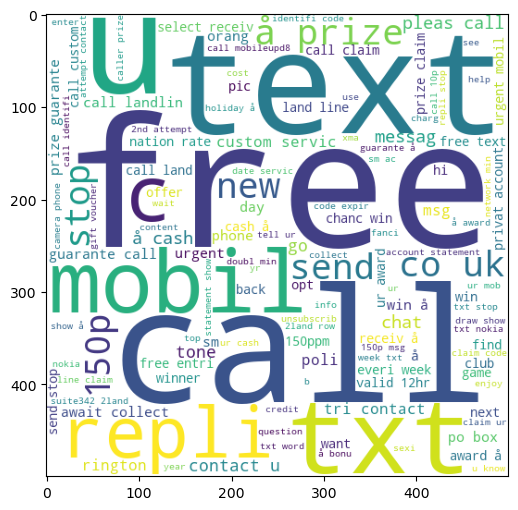

In [45]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

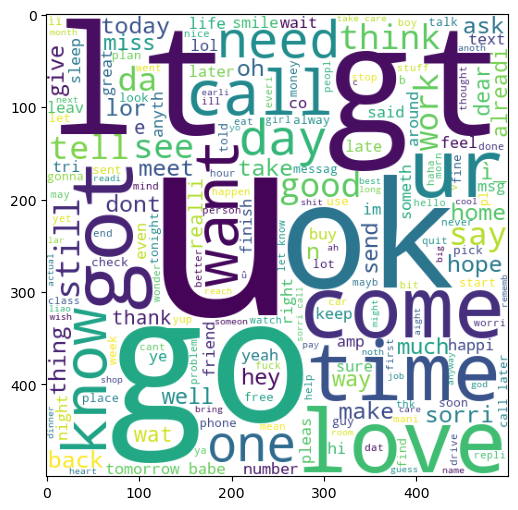

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [65]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()

In [66]:
x=tfidf.fit_transform(df['transformed_text']).toarray()

In [67]:
x.shape #(messages,words)

(5572, 7214)

In [68]:
y=df['target'].values

In [69]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [70]:
from sklearn.model_selection import train_test_split


In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [71]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score


In [72]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()


In [73]:
gnb.fit(x_train, y_train)
y_pred1 = gnb.predict(x_test)

print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))


0.8798206278026905
[[848 109]
 [ 25 133]]
0.5495867768595041


In [74]:
mnb.fit(x_train, y_train)
y_pred2 = mnb.predict(x_test)

print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.979372197309417
[[948   9]
 [ 14 144]]
0.9411764705882353


In [75]:
bnb.fit(x_train, y_train)
y_pred3 = bnb.predict(x_test)

print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9757847533632287
[[956   1]
 [ 26 132]]
0.9924812030075187


In [ ]:
#IN THE ABOVE 0.9757..IS ACCURACY
#0.99248....IS PRECISION SCORE(BOTH SHOULD BE MORE)

In [77]:
import pickle
pickle.dump(tfidf,open('Vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))